The dataset present highlight the various creative ventures on Kickstarter and how various campaigns to support their respective projects and whether they were able to reach their goal of securing the resources from the platform. The various attributes we would be looking at include
- goal
- amount pledged
- state of project
- category of project
- staff picked
- spotlight

We would be scrutinizing the available data for patterns and derive conclusions based on our findings. We would be using numpy as the primary library to do data analysis.

We would be importing multiple columns of data from the Kickstarter dataset to do our analysis. The following steps include loading the data into numpy and performing basic descriptive statistics.

In [1]:
# Importing numpy
import numpy as np

In [2]:
# Loading project data into numpy
projects = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=0, delimiter=',')

In [3]:
# Calculating the size of the project
print('The size of project is', projects.size)

The size of project is 4184


Since we have to work with currencies from different countries, to maintain uniformity, we would convert all the currencies to US dollars to continue our analysis.

In [4]:
# Loading the pledge amount data into numpy
pledge_amount = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=3, delimiter=',')

In [5]:
# Loading currency info data into numpy
currency = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=6, delimiter=',', dtype=str)

In [6]:
# Displaying all the unique currency loaded
np.unique(currency)

array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'NOK', 'NZD', 'SEK',
       'USD'], dtype='<U3')

In [7]:
# Displaying all the pledged amounts
pledge_amount

array([ 321.  , 7070.  , 4431.12, ...,   50.  ,  155.  ,  155.  ])

In [8]:
# Code to convert all the different currencies to US dollars
x = 0
currency_convert = []
np.array(currency_convert)
while x < pledge_amount.size:
    if currency[x] == 'AUD':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.64)
    elif currency[x] == 'CAD':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.73)
    elif currency[x] == 'CHF':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 1.10)
    elif currency[x] == 'DKK':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.14)
    elif currency[x] == 'EUR':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 1.06)
    elif currency[x] == 'GBP':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 1.22)
    elif currency[x] == 'NOK':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.092)
    elif currency[x] == 'NZD':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.60)
    elif currency[x] == 'SEK':
        currency_convert = np.append(currency_convert, pledge_amount[x] * 0.091)
    else:
        currency_convert = np.append(currency_convert, pledge_amount[x])
    x+=1
currency_convert
        

array([ 321.  ,  643.37, 4431.12, ...,   50.  ,  189.1 ,  155.  ])

In [9]:
# Displaying the count of all the amounts pledged
pledge_amount.size

4184

In [10]:
# Displaying the max amount pledged in US dollars
print('Maximum amount pledged $', np.max(currency_convert))

Maximum amount pledged $ 111111.77


In [11]:
# Displaying the mean of amount pledged in US dollars
mean_pledged_amount = np.mean(currency_convert)
print(f'Mean of amount pledged $ {mean_pledged_amount:.2f}')

Mean of amount pledged $ 1205.51


In [12]:
# Displaying the minimum amount pledged in US dollars
print('Minimum amount pledged $', np.min(currency_convert))

Minimum amount pledged $ 0.0


In [13]:
# Displaying the mean amount pledged in US dollars
print('Median of amount pledged $', np.median(currency_convert))

Median of amount pledged $ 85.0


In [14]:
# Displaying the standard deviation of amount pledged in US dollars
std_pledged_amount =  np.std(currency_convert)
print(f'Standard deviation of amount pledged $ {std_pledged_amount:.2f}')

Standard deviation of amount pledged $ 5022.06


In [15]:
# getting the array of all pledges greater than 2500 US dollars
greater_amt = currency_convert[currency_convert >= 2500]

In [16]:
percent_project = (greater_amt.size/currency_convert.size) * 100

In [17]:
# Displaying the percent of amounts pledged at least 2500 US dollars
print(f'Percent of amounts pledged at least 2500 US dollars {percent_project:.2f} %')

Percent of amounts pledged at least 2500 US dollars 10.44 %


We are loading categorical data about the various projects in the dataset. This would help in comprehending the distribution of projects and derive necessary conclusions for our analysis.

We would be calculating how much each of the catergories would be contributing to the overall set of projects in the dataset.

In [18]:
# Loading the category data into numpy
category = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=12, dtype=str, delimiter=',')

In [19]:
# Displaying all the category data
category

array(['Conceptual Art', 'Conceptual Art', 'Conceptual Art', ...,
       'Painting', 'Painting', 'Painting'], dtype='<U14')

In [20]:
# Displaying all the unique categories of data
np.unique(category)

array(['Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
       'Painting'], dtype='<U14')

In [21]:
# Storing the unique categories and their frequency
unique_category, counts_category = np.unique(category, return_counts=True)

In [22]:
print('Frequency of all the categories\n',np.array((unique_category, counts_category)).T)

Frequency of all the categories
 [['Ceramics' '204']
 ['Conceptual Art' '879']
 ['Digital Art' '1054']
 ['Illustration' '461']
 ['Painting' '1586']]


In [23]:
# Calculating the percent of each category from the data
percentage_category = (counts_category/category.size) * 100

In [24]:
# Displaying all the categories with the percentage of their frequency
print('Percentage of all the categories\n', np.array((unique_category, percentage_category)).T)

Percentage of all the categories
 [['Ceramics' '4.875717017208412']
 ['Conceptual Art' '21.008604206500955']
 ['Digital Art' '25.191204588910132']
 ['Illustration' '11.018164435946463']
 ['Painting' '37.90630975143404']]


In [25]:
# Importing matplotlib for visual representation of data
import matplotlib.pyplot as plt

We are plotting the graph to visually represent the distribution of different categories to the overall projects in Kickstarter

Text(0.5, 1.0, 'Category of project by percentage')

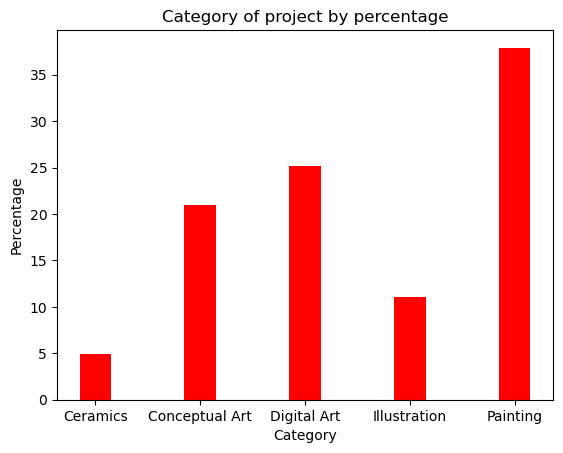

In [26]:
# Setting the properties of the bar graph for the category of project by percentage
plt.bar(unique_category, percentage_category, color='red', width=0.3)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Category of project by percentage")

Inference1: From the bar graph, we could conclude that most of the projects in the data set were for some form of painting and the lowest were in the category of ceramics.

Inference2: All of the projects were some form of art forms in the kickstarter dataset.

In [27]:
# Loading all the project_states data into numpy
project_states = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=4, dtype=str, delimiter=',')
# Displaying all the unique project states from the data
np.unique(project_states)

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype='<U10')

In [28]:
# Code to track all the success and failure scenarios of kickstarter projects for each of the categories
y = 0
ceramics_success = 0
ceramics_failure = 0
concept_art_success = 0
concept_art_failure = 0
digital_art_success = 0
digital_art_failure = 0
ills_success = 0
ills_failure = 0
painting_success = 0
painting_failure = 0
other_outcomes = 0
while y < project_states.size:
    if category[y] == 'Ceramics':
        if project_states[y] == 'successful':
            ceramics_success += 1
        else:
            ceramics_failure += 1
    elif category[y] == 'Conceptual Art':
        if project_states[y] == 'successful':
            concept_art_success += 1
        else:
            concept_art_failure += 1
    elif category[y] == 'Digital Art':
        if project_states[y] == 'successful':
            digital_art_success += 1
        else:
            digital_art_failure += 1
    elif category[y] == 'Illustration':
        if project_states[y] == 'successful':
            ills_success += 1
        else:
            ills_failure += 1
    elif category[y] == 'Painting':
        if project_states[y] == 'successful':
            painting_success += 1
        else:
            painting_failure += 1
    else:
        other_outcomes += 1
    y += 1
print(f'{ceramics_success},{concept_art_success},{digital_art_success},{ills_success},{painting_success},{ceramics_failure},{concept_art_failure},{digital_art_failure},{ills_failure},{painting_failure}')

84,322,286,0,0,120,557,768,461,1586


In [29]:
# Calculating the success percentage of all the categories
ceramics_success_percent = (ceramics_success/(ceramics_success + ceramics_failure)) * 100
concept_art_success_percent = (concept_art_success/(concept_art_success + concept_art_failure)) * 100
digital_art_success_percent = (digital_art_success/(digital_art_success + digital_art_failure)) * 100
ills_success_percent = (ills_success/(ills_success + ills_failure)) * 100
painting_success_percent = (painting_success/(painting_success + painting_failure)) * 100
percent_success_all = [ceramics_success_percent, concept_art_success_percent, digital_art_success_percent, ills_success_percent, painting_success_percent]
np.array(percent_success_all)
print('Percent success of all the categories\n', np.array((unique_category, percent_success_all)).T)



Percent success of all the categories
 [['Ceramics' '41.17647058823529']
 ['Conceptual Art' '36.6325369738339']
 ['Digital Art' '27.13472485768501']
 ['Illustration' '0.0']
 ['Painting' '0.0']]


Text(0.5, 1.0, 'Category success percentage')

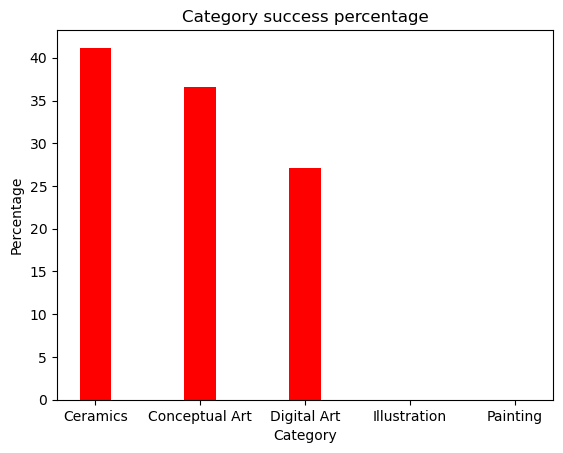

In [30]:
# Setting the properties of the bar graph for category success percentage
plt.bar(unique_category, percent_success_all, color='red', width=0.3)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Category success percentage")

The graph potrays the percentage of success achieved by each category in reaching their funding goal on Kickstarter. We could see that Illustration and Paintings categories failed to reach target audience.

Ceramics was the most successful category. Paintings and illustrations were the least successful categories

We are loading staff picked projects and projects that were put on spotlight on Kickstarter, to analyse their influence on the success of the various projects

In [31]:
# Loading staff_pick data into numpy
staff_pick = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=8, dtype=str, delimiter=',')

In [32]:
# Displaying all the staff_pick data
staff_pick

array(['FALSE', 'FALSE', 'FALSE', ..., 'FALSE', 'FALSE', 'FALSE'],
      dtype='<U5')

In [33]:
# Displaying the staff pick data size
staff_pick.size

4184

In [34]:
# Loading spotlight data into numpy
spotlight = np.loadtxt('HW3_kickstarter.csv', skiprows=1, usecols=13, dtype=str, delimiter=',')

In [35]:
# Displaying the spotlight data
spotlight

array(['TRUE', 'TRUE', 'TRUE', ..., 'FALSE', 'FALSE', 'FALSE'],
      dtype='<U5')

In [36]:
# Displaying the spotlight data size
spotlight.size

4184

In [37]:
# Calculating the count of all projects that were staff picked or not
unique_staff_pick, counts_staff_pick = np.unique(staff_pick, return_counts=True)

In [38]:
# Displaying the count of projects that were staff picked or not
print(np.array((unique_staff_pick, counts_staff_pick)).T)
print('Total staff picked projects is', counts_staff_pick[1])

[['FALSE' '3960']
 ['TRUE' '224']]
Total staff picked projects is 224


In [39]:
# Calculating count of all projects that were in spotlight or not
unique_spotlight, counts_spotlight = np.unique(spotlight, return_counts=True)

In [40]:
# Displaying the count of all projects that were in spotlight or not
print(np.array((unique_spotlight, counts_spotlight)).T)
print('Total spotlight projects is', counts_spotlight[1])

[['FALSE' '3492']
 ['TRUE' '692']]
Total spotlight projects is 692


In [41]:
# Calculating the percent of projects that were staff picked or not
percentage_staff_pick = (counts_staff_pick/staff_pick.size) * 100

In [42]:
print(np.array((unique_staff_pick, percentage_staff_pick)).T)

[['FALSE' '94.64627151051626']
 ['TRUE' '5.353728489483748']]


In [43]:
# Calculating the percent of projects that were in spotlight or not
percentage_spotlight = (counts_spotlight/spotlight.size) * 100

In [44]:
print(np.array((unique_spotlight, percentage_spotlight)).T)

[['FALSE' '83.46080305927343']
 ['TRUE' '16.539196940726576']]


In [45]:
# Calculating the success rate of the projects that were put into spotlight
z = 0
spotlight_success = 0
spotlight_failure = 0
not_spotlight = 0
while z < project_states.size:
    if spotlight[z] == 'TRUE':
        if project_states[z] == 'successful':
            spotlight_success += 1
        else:
            spotlight_failure += 1
    else:
        not_spotlight += 1
    z += 1
success_rate_spotlight = (spotlight_success/(spotlight_success + spotlight_failure)) * 100
print(f'Spotlight projects success rate is {success_rate_spotlight} %')
            

Spotlight projects success rate is 100.0 %


In [46]:
# Calculating the success rate of the projects that were staff picked
a = 0
staff_pick_success = 0
staff_pick_failure = 0
not_staff_pick = 0
while a < project_states.size:
    if staff_pick[a] == 'TRUE':
        if project_states[a] == 'successful':
            staff_pick_success += 1
        else:
            staff_pick_failure += 1
    else:
        not_staff_pick += 1
    a += 1
success_rate_staff = (staff_pick_success/(staff_pick_success + staff_pick_failure)) * 100
print(f'Staff picked projects success rate is {success_rate_staff:.2f} %')
print(staff_pick_failure)
            

Staff picked projects success rate is 72.77 %
61


Inference: Spotlight feature is associated with the highest percentage of successful projects. This could means that the Kickstarter platform would boost projects into spotlight that are closer to their funding goals. Staff picked projects might have a concrete idea at their base but some of them might fail to reach their target audience and fail ultimately to reach their goal.

We would be analysing the staff picked projects that failed to ultimately reach their goal.

We could see that out of the total 224 staff picked projects, 61 failed to reach their goals.

In [47]:
# Calculating the count of all staff_picked projects that failed due to it being cancelled, suspended or failed
# or the funding is still live
b = 0
staff_pick_failed = 0
staff_pick_cancelled = 0
staff_pick_suspended = 0
staff_pick_live = 0
while b < project_states.size:
    if staff_pick[b] == 'TRUE':
        if project_states[b] == 'failed':
            staff_pick_failed += 1
        if project_states[b] == 'canceled':
            staff_pick_cancelled += 1
        if project_states[b] == 'suspended':
            staff_pick_suspended += 1
        if project_states[b] == 'live':
            staff_pick_live += 1
    b += 1
print(f'{staff_pick_failed},{staff_pick_cancelled},{staff_pick_suspended},{staff_pick_live}')
            


46,14,0,1


In [48]:
# Displaying the count of each reason the staff picked project didn't reach their funding goal
staff_pick_array = ['failed','cancelled','suspended','live']
staff_pick_array_values = [staff_pick_failed, staff_pick_cancelled, staff_pick_suspended, staff_pick_live]
print(np.array((staff_pick_array, staff_pick_array_values)).T)

[['failed' '46']
 ['cancelled' '14']
 ['suspended' '0']
 ['live' '1']]


Text(0.5, 1.0, 'Staff picked projects distribution')

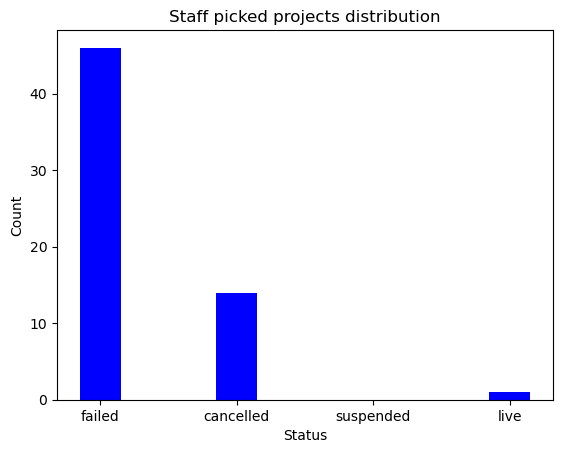

In [49]:
# Setting the properties of the bar graph for staff picked projects that couldn't meet funding goals
plt.bar(staff_pick_array, staff_pick_array_values, color='blue', width=0.3)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Staff picked projects distribution")

We could see from the graph that not all the staff picked projects that didn't reach the funding goal failed. We see that 14 of them were cancelled for some reasons and 1 of them is still currently running to obtain more funds.